<a href="https://colab.research.google.com/github/AnasBakr/Ml-projects-/blob/main/Diabetes_prediction_Classification_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing dependecies

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix ,classification_report ,accuracy_score ,recall_score ,f1_score

import warnings
warnings.filterwarnings('ignore')

# Data Analysis and visualization

In [2]:
data = pd.read_csv('/content/diabetes.csv')

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.shape

(768, 9)

In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

we have seen that the data have 768 records with 9 features,There are no duplicates and null values

---



In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [10]:
data.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


These are some statistical facts about the dataset



---




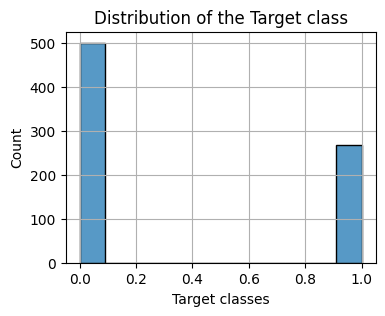

In [11]:
plt.figure(figsize=(4, 3))
sns.histplot(data=data, x='Outcome')
plt.title('Distribution of the Target class')
plt.xlabel('Target classes')
plt.ylabel('Count')
plt.grid(True)
plt.show()

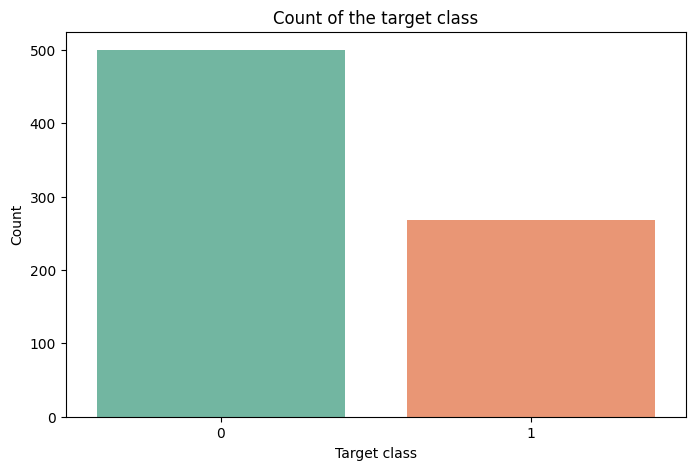

In [12]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Outcome',data=data,palette=sns.color_palette("Set2"))
plt.xlabel('Target class')
plt.ylabel('Count')
plt.title('Count of the target class')
plt.show()

the target class is imbalanced clearly

---



array([[<Axes: title={'center': 'Pregnancies'}>,
        <Axes: title={'center': 'Glucose'}>,
        <Axes: title={'center': 'BloodPressure'}>],
       [<Axes: title={'center': 'SkinThickness'}>,
        <Axes: title={'center': 'Insulin'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'DiabetesPedigreeFunction'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Outcome'}>]], dtype=object)

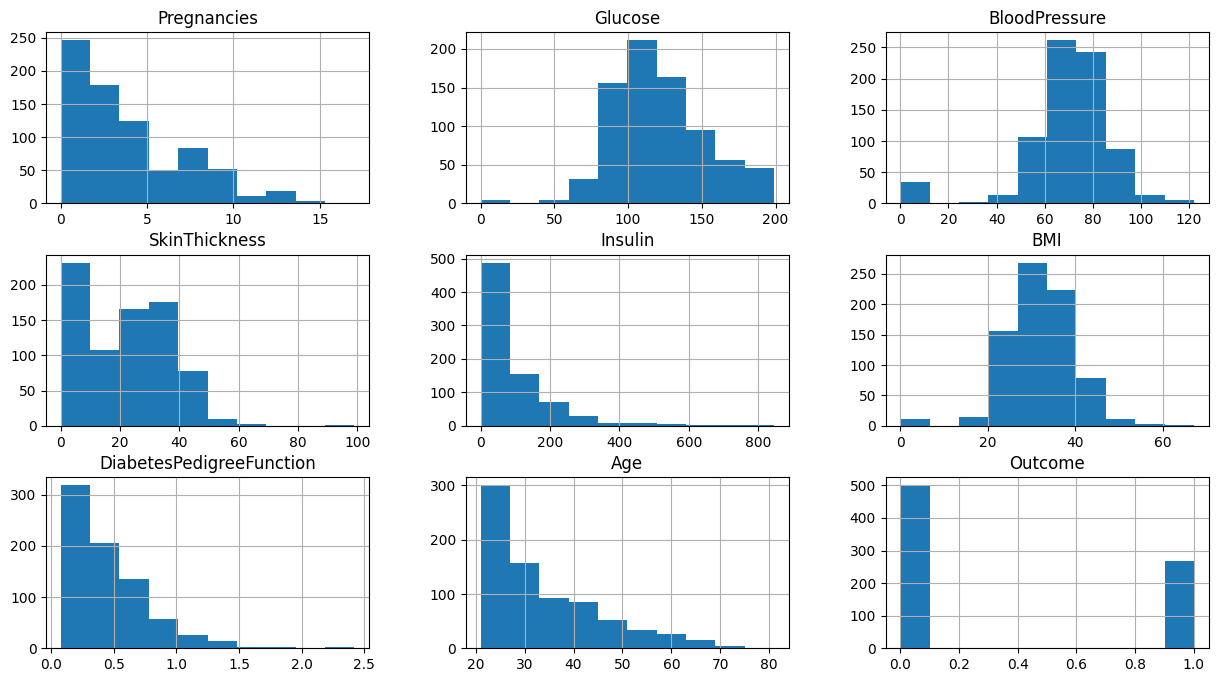

In [13]:
data.hist(figsize=(15,8))

here is the distribution of the features


---



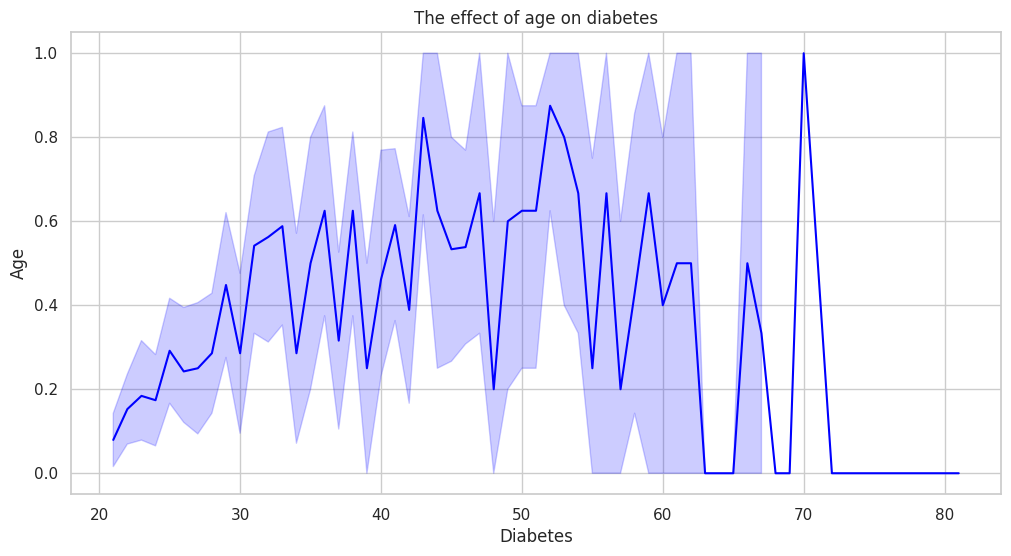

In [14]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.lineplot(data=data, x='Age', y='Outcome', color='blue')

plt.xlabel('Diabetes')
plt.ylabel('Age')
plt.title('The effect of age on diabetes')

plt.show()

In [15]:
correlation = data.corr()

<Axes: >

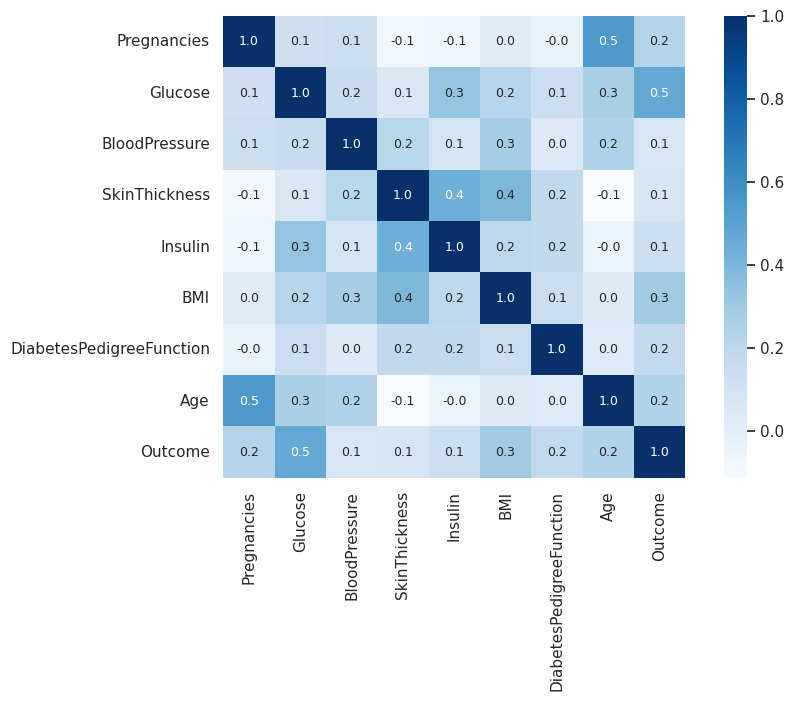

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation ,square=True ,cbar=True ,fmt='.1f' ,annot=True ,annot_kws={'size' : 9} ,cmap='Blues')



---

# Machine learning

The **normal** data

In [17]:
X = data.drop(columns = 'Outcome', axis=1)
Y = data['Outcome']

              precision    recall  f1-score   support

           0       0.79      0.89      0.83       150
           1       0.73      0.56      0.63        81

    accuracy                           0.77       231
   macro avg       0.76      0.72      0.73       231
weighted avg       0.77      0.77      0.76       231



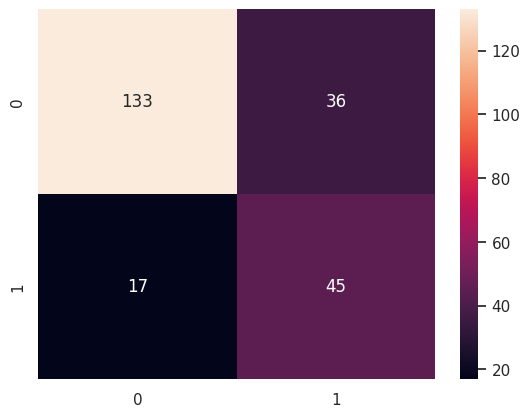

In [18]:
model = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3 ,stratify=Y ,random_state=0)
model.fit(x_train, y_train)
pre = model.predict(x_test)
accuracy = accuracy_score(pre, y_test)
recall = recall_score(pre, y_test)
f1 = f1_score(pre, y_test)
print(classification_report(y_test, pre))
cm = confusion_matrix(pre, y_test)
sns.heatmap(cm , annot=True ,fmt='g' )
plt.show()

since it is an imbalanced data so we are looking for the recal of the two class 0 and 1 ,so as you can see it is very low in 1 so we will try to improve it


---



using **SMOTE**

In [19]:
sm = SMOTE(random_state = 2)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

              precision    recall  f1-score   support

           0       0.86      0.79      0.82       150
           1       0.66      0.77      0.71        81

    accuracy                           0.78       231
   macro avg       0.76      0.78      0.77       231
weighted avg       0.79      0.78      0.78       231



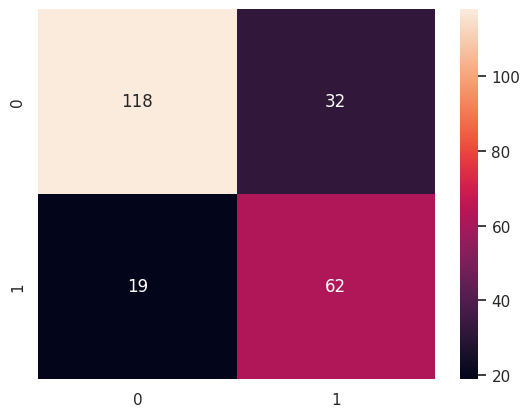

In [20]:
model.fit(x_train_res, y_train_res.ravel())
predictions = model.predict(x_test)

# print classification report
print(classification_report(y_test, predictions))

cm1 = confusion_matrix(y_test ,predictions )
sns.heatmap(cm1 , annot=True ,fmt='g' )
plt.show()

As you can see we improve the recall for your minor class with some decrease in the majority class


---




Using **Random Undersampling**

In [21]:
from imblearn.under_sampling import RandomUnderSampler

In [22]:
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X, Y)

              precision    recall  f1-score   support

           0       0.85      0.80      0.82       150
           1       0.66      0.73      0.69        81

    accuracy                           0.77       231
   macro avg       0.75      0.76      0.76       231
weighted avg       0.78      0.77      0.78       231



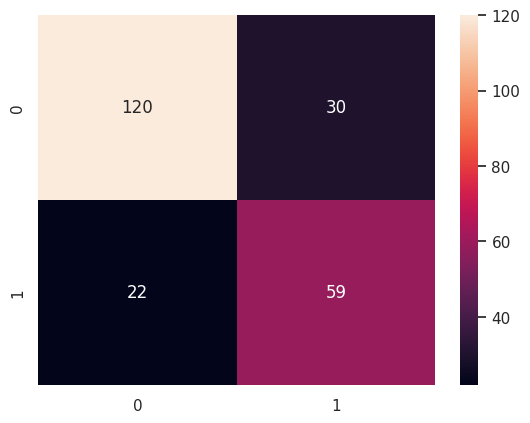

In [23]:
model.fit(X_under, y_under)
predictions = model.predict(x_test)

# print classification report
print(classification_report(y_test, predictions))

cm1 = confusion_matrix(y_test ,predictions )
sns.heatmap(cm1 , annot=True ,fmt='g' )
plt.show()

Here we improved the reacl of our minor class even more but in the cost of the major class


---



Using **Random Oversampling**

In [24]:
from imblearn.over_sampling import RandomOverSampler

In [25]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, Y)

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       150
           1       0.68      0.78      0.73        81

    accuracy                           0.80       231
   macro avg       0.78      0.79      0.78       231
weighted avg       0.81      0.80      0.80       231



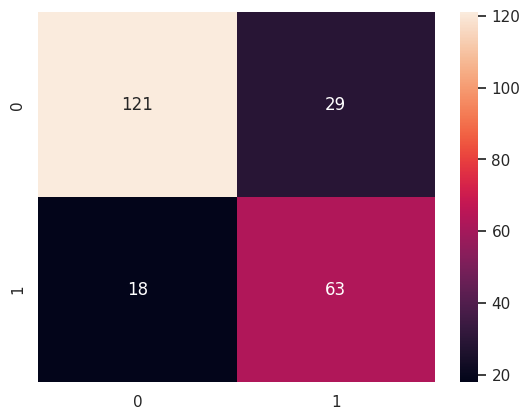

In [26]:
model.fit(X_over, y_over)
predictions = model.predict(x_test)

# print classification report
print(classification_report(y_test, predictions))

cm1 = confusion_matrix(y_test ,predictions )
sns.heatmap(cm1 , annot=True ,fmt='g' )
plt.show()

this is the best balanced approach till now with 79% recal for the major class and 80% for the minor class


---



# Conclusion
since it is an imbalanced data so we are focusing on the **recal** so to maxmize it we will us the **Random Oversampling**


---



Saving the trained model


---



In [31]:
import pickle

In [32]:
filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [33]:
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [34]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[1]
The person is diabetic
